## Import necessary modules
Run this cell before running any other cells

In [ ]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np


LOG.propagate = False

# Printing and Logging
## Printing
You can use the **print()** function in Python to print messages to the screen. <br>
The message can be a string, or any other object, the object will be converted into a string before it is written to the screen. <br>

## Logging
You could use the logging module that is setup in *utils.py*. <br>
It prints to both your screen (standard output) as well as to log files (*ble.log*) in the *logs* directory. <br>
This is the recommended way to output messages, since the log files can help with debugging. <br>
The logging module also provides different log levels as shown below, each formatted with a different color for increased visibility. <br>

__**NOTE**__: You may notice that the DEBUG message is not printed to the screen but is printed in the log file. This is because the logging level for the screen is set to INFO and for the file is set to DEBUG. You can change the default log levels in *utils.py* (**STREAM_LOG_LEVEL** and **FILE_LOG_LEVEL**). 

## Formatting output
To format your strings, you may use %-formatting, str.format() or f-strings. <br>
The most "pythonic" way would be to use f-strings. [Here](https://realpython.com/python-f-strings/) is a good tutorial on f-strings. <br>

In [ ]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

<hr>

# BLE
## ArtemisBLEController
The class **ArtemisBLEController** (defined in *ble.py*) provides member functions to handle various BLE operations to send and receive data to/from the Artemis board, provided the accompanying Arduino sketch is running on the Artemis board. <br>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Functions</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">reload_config()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Reload changes made in <em>connection.yaml.</em></span></th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">connect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Connect to the Artemis board, whose MAC address is specified in <em>connection.yaml</em>.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">disconnect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Disconnect from the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">is_connected()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Return a boolean indicating whether your controller is connected to the Artemis board or not.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">send_command(cmd_type, data)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Send the command <strong>cmd_type</strong> (integer) with <strong>data</strong> (string) to the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">receive_float(uuid) <br> receive_string(uuid) <br> receive_int(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Read the GATT characteristic (specified by its <strong>uuid</strong>) of type float, string or int. <br> The type of the GATT
            characteristic is determined by the classes BLEFloatCharacteristic, BLECStringCharacteristic or
            BLEIntCharacteristic in the Arduino sketch.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">start_notify(uuid, notification_handler)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Activate notifications on the GATT characteristic (specified by its <strong>uuid</strong>). <br> <strong>notification_handler</strong> is a
            function callback which must accept two inputs; the first will be a uuid string object and the second will
            be the bytearray of the characteristic value.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">bytearray_to_float(byte_array) <br> bytearray_to_string(byte_array) <br> bytearray_to_int(byte_array)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Convert the <strong>bytearray</strong> to float, string or int, respectively. <br> You may use these functions inside your
            notification callback function.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">stop_notify(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Stop notifications on the GATT characteristic (specified by its <strong>uuid</strong>).</span></th>
    </tr>
</table>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Variables</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">uuid</span></th>
        <th style="text-align: left"><span style="font-weight: normal">A dictionary that stores the UUIDs of the various characteristics specified in <em>connection.yaml</em>.</span></th>
    </tr>
</table>

## Configuration
- The MAC address, Service UUID and GATT characteristic UUIDs are defined in the file: *connection.yaml*.
- They should match the UUIDs used in the Arduino sketch.
- The artemis board running the base code should display its MAC address in the serial monitor.
- Update the **artemis_address** in *connection.yaml*, accordingly.
- Make sure to call **ble.reload_config()** or **get_ble_controller()** (which internally calls **reload_config()**) after making any changes to your configuration file.

<hr>

In the below cell, we create an **ArtemisBLEController** object using **get_ble_controller()** (defined in *ble.py*), which creates and/or returns a single instance of **ArtemisBLEController**. <br>
<span style="color:rgb(240,50,50)"> __NOTE__: Do not use the class directly to instantiate an object. </span><br>

In [387]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-05-03 16:38:41,559 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:07:1d:96:09:44
2023-05-03 16:38:46,990 | INFO     |: Connected to c0:07:1d:96:09:44


## Receive data from the Artemis board

The cell below shows examples of reading different types (as defined in the Arduino sketch) of GATT characteristics.

In [ ]:
# Read a float GATT Charactersistic
f = ble.receive_float(ble.uuid['RX_FLOAT'])
print(f)

In [ ]:
# Read a string GATT Charactersistic
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

## Send a command to the Artemis board
Send the PING command and read the reply string from the string characteristic RX_STRING. <br>
__NOTE__: The **send_command()** essentially sends a string data to the GATT characteristic (TX_CMD_STRING). The GATT characteristic in the Arduino sketch is of type BLECStringCharacteristic.

In [ ]:
ble.send_command(CMD.PING, "")

In [ ]:
s = ble.receive_string(ble.uuid['RX_STRING2'])
print(s)

The cell below shows an example of the SEND_TWO_INTS command. <br> The two values in the **data** are separated by a delimiter "|". <br>
Refer Lab 2 documentation for more information on the command protocol.

In [ ]:
ble.send_command(CMD.SEND_TWO_INTS, "2|-6")

In [ ]:
ble.send_command(CMD.START, "")

In [ ]:
ble.send_command(CMD.STOP, "")


#### Notification Handler

In [ ]:
      
d1 = []
TOFtimes = []
def tof_handler(uuid, byte_array):
    global d1
    global TOFtimes
    s = ble.bytearray_to_string(byte_array).split("|")   
    TOFtimes.append(int(s[0].split(":")[1]))
    d1.append(float(s[1].split(":")[1]))

pitch = []
roll = []
IMUtimes = []
def imu_handler(uuid, byte_array):
    global pitch
    global roll
    global IMUtimes
    s = ble.bytearray_to_string(byte_array).split("|")  
    IMUtimes.append(int(s[0].split(":")[1]))
    pitch.append(float(s[1].split(":")[1]))
    roll.append(float(s[2].split(":")[1])) 
    
    


    

In [ ]:
ble.start_notify(ble.uuid['RX_STRING'], imu_handler)

In [ ]:
ble.start_notify(ble.uuid['RX_STRING2'], tof_handler)

In [ ]:
ble.send_command(CMD.GET_TOF_5s,"")

In [ ]:
print(TOFtimes)
print(d1)

In [388]:
times = []
dist = []
pwm = []


def pid_handler(uuid,byte_array):
    global times
    global dist
    global pwm
    s = ble.bytearray_to_string(byte_array).split("|") 
    times.append(s[0].split(":")[1])
    dist.append(s[1].split(":")[1])
    pwm.append(s[2].split(":")[1])    

ble.start_notify(ble.uuid['RX_STRING'], pid_handler)
ble.send_command(CMD.START_PID, "")


In [386]:
ble.send_command(CMD.STOP, "")


2023-05-03 16:38:08,438 | INFO     |: Disconnected from c0:07:1d:96:09:44


OSError: [WinError -2147467260] Operation aborted

In [344]:
print(times)
print(tof)
print(mot)
print(len(times))
print(int(times[len(times)-1]) - int(times[0]))

['175646', '175646', '175649', '175649', '175660', '175660', '175671', '175671', '175684', '175684', '175690', '175690', '175701', '175701', '175712', '175712', '175723', '175723', '175732', '175732', '175738', '175738', '175743', '175743', '175754', '175754', '175760', '175760', '175765', '175765', '175770', '175770', '175776', '175776', '175787', '175787', '175800', '175800', '175805', '175805', '175816', '175816', '175827', '175827', '175838', '175838', '175845', '175845', '175856', '175856', '175867', '175867', '175878', '175878', '175889', '175889', '175905', '175905', '175920', '175920', '175931', '175931', '175942', '175942', '175953', '175953', '175969', '175969', '175980', '175980', '175993', '175993', '175999', '175999', '176004', '176004', '176015', '176015', '176028', '176028', '176034', '176034', '176045', '176045', '176050', '176050', '176056', '176056', '176061', '176061', '176067', '176067', '176077', '176077', '176091', '176091', '176096', '176096', '176107', '176107',

In [390]:
times = ['175646', '175646', '175649', '175649', '175660', '175660', '175671', '175671', '175684', '175684', '175690', '175690', '175701', '175701', '175712', '175712', '175723', '175723', '175732', '175732', '175738', '175738', '175743', '175743', '175754', '175754', '175760', '175760', '175765', '175765', '175770', '175770', '175776', '175776', '175787', '175787', '175800', '175800', '175805', '175805', '175816', '175816', '175827', '175827', '175838', '175838', '175845', '175845', '175856', '175856', '175867', '175867', '175878', '175878', '175889', '175889', '175905', '175905', '175920', '175920', '175931', '175931', '175942', '175942', '175953', '175953', '175969', '175969', '175980', '175980', '175993', '175993', '175999', '175999', '176004', '176004', '176015', '176015', '176028', '176028', '176034', '176034', '176045', '176045', '176050', '176050', '176056', '176056', '176061', '176061', '176067', '176067', '176077', '176077', '176091', '176091', '176096', '176096', '176107', '176107', '176118', '176118', '176123', '176123', '176133', '176133', '176138', '176138', '176149', '176149', '176160', '176160', '176171', '176171', '176182', '176182', '176193', '176193', '176210', '176210', '176220', '176220', '176231', '176231', '176239', '176239', '176250', '176250', '176261', '176261', '176272', '176272', '176283', '176283', '176294', '176294', '176305', '176305', '176310', '176310', '176321', '176321', '176332', '176332', '176343', '176343', '176348', '176348', '176354', '176354', '176365', '176365', '176376', '176376', '176382', '176382', '176393', '176393', '176404', '176404', '176421', '176421', '176434', '176434', '176439', '176439', '176450', '176450', '176456', '176456', '176461', '176461', '176467', '176467', '176472', '176472', '176478', '176478', '176488', '176488', '176499', '176499', '176510', '176510', '176522', '176522', '176533', '176533', '176544', '176544', '176555', '176555', '176566', '176566', '176579', '176579', '176585', '176585', '176590', '176590', '176596', '176596', '176601', '176601', '176607', '176607', '176612', '176612', '176617', '176617', '176623', '176623', '176628', '176628', '176634', '176634', '176639', '176639', '176650', '176650', '176661', '176661', '176672', '176672', '176683', '176683', '176694', '176694', '176711', '176711', '176724', '176724', '176729', '176729', '176740', '176740', '176751', '176751', '176762', '176762', '176767', '176767', '176777', '176777', '176782', '176782', '176788', '176788', '176793', '176793', '176799', '176799', '176804', '176804', '176810', '176810', '176815', '176815', '176821', '176821', '176826', '176826', '176837', '176837', '176850', '176850', '176859', '176859', '176875', '176875', '176886', '176886', '176897', '176897', '176908', '176908', '176914', '176914', '176919', '176919', '176930', '176930', '176936', '176936', '176941', '176941', '176947', '176947', '176958', '176958', '176969', '176969', '176974', '176974', '176980', '176980', '176985', '176985', '176996', '176996', '177007', '177007', '177012', '177012', '177023', '177023', '177029', '177029', '177034', '177034', '177045', '177045', '177056', '177056', '177071', '177071', '177077', '177077', '177088', '177088', '177099', '177099', '177109', '177109', '177119', '177119', '177125', '177125', '177130', '177130', '177141', '177141', '177148', '177148', '177153', '177153', '177164', '177164', '177175', '177175', '177186', '177186', '177191', '177191', '177202', '177202', '177209', '177209', '177220', '177220', '177231', '177231', '177242', '177242', '177253', '177253', '177263', '177263', '177274', '177274', '177280', '177280', '177285', '177285', '177291', '177291', '177296', '177296', '177307', '177307', '177318', '177318', '177329', '177329', '177340', '177340', '177351', '177351', '177362', '177362', '177374', '177374', '177380', '177380', '177390', '177390', '177401', '177401', '177407', '177407', '177414', '177414', '177425', '177425', '177436', '177436', '177447', '177447', '177464', '177464', '177479', '177479', '177490', '177490', '177501', '177501', '177512', '177512', '177522', '177522', '177533', '177533', '177542', '177542', '177553', '177553', '177564', '177564', '177575', '177575', '177586', '177586', '177597', '177597', '177610', '177610', '177621', '177621', '177637', '177637', '177648', '177648', '177659', '177659', '177675', '177675', '177686', '177686', '177700', '177700', '177711', '177711', '177722', '177722', '177733', '177733', '177750', '177750', '177761', '177761', '177771', '177771', '177787', '177787', '177792', '177792', '177803', '177803', '177814', '177814', '177825', '177825', '177839', '177839', '177850', '177850', '177861', '177861', '177872', '177872', '177883', '177883', '177894', '177894', '177905', '177905', '177913', '177913', '177924', '177924', '177935', '177935', '177946', '177946', '177957', '177957', '177968', '177968', '177973', '177973', '177979', '177979', '177984', '177984', '177995', '177995', '178001', '178001', '178008', '178008', '178019', '178019', '178030', '178030', '178041', '178041', '178052', '178052', '178063', '178063', '178069', '178069', '178074', '178074', '178085', '178085', '178096', '178096', '178107', '178107', '178118', '178118', '178132', '178132', '178143', '178143', '178154', '178154', '178165', '178165', '178176', '178176', '178186', '178186', '178192', '178192', '178198', '178198', '178208', '178208', '178219', '178219', '178230', '178230', '178241', '178241', '178252', '178252', '178263', '178263', '178280', '178280', '178290', '178290', '178301', '178301', '178307', '178307', '178312', '178312', '178318', '178318', '178325', '178325', '178331', '178331', '178342', '178342', '178353', '178353', '178359', '178359', '178370', '178370', '178381', '178381', '178392', '178392', '178403', '178403', '178412', '178412', '178423', '178423', '178434', '178434', '178444', '178444', '178455', '178455', '178466', '178466', '178479', '178479', '178485', '178485', '178496', '178496', '178507', '178507', '178518', '178518', '178529', '178529', '178535', '178535', '178546', '178546', '178557', '178557', '178568', '178568', '178579', '178579', '178590', '178590', '178595', '178595', '178606', '178606', '178617', '178617', '178623', '178623', '178630', '178630', '178641', '178641', '178652', '178652', '178663', '178663', '178674', '178674', '178683', '178683', '178694', '178694', '178705', '178705', '178715', '178715', '178726', '178726', '178739', '178739', '178745', '178745', '178756', '178756', '178767', '178767', '178773', '178773', '178784', '178784', '178795', '178795', '178806', '178806', '178815', '178815', '178826', '178826', '178842', '178842', '178853', '178853', '178869', '178869', '178880', '178880', '178891', '178891', '178898', '178898', '178909', '178909', '178920', '178920', '178931', '178931', '178942', '178942', '178953', '178953', '178958', '178958', '178969', '178969', '178980', '178980', '178985', '178985', '178992', '178992', '179003', '179003', '179014', '179014', '179025', '179025', '179036', '179036', '179052', '179052', '179067', '179067', '179078', '179078', '179089', '179089', '179100', '179100', '179111', '179111', '179122', '179122', '179130', '179130', '179141', '179141', '179152', '179152', '179169', '179169', '179180', '179180', '179192', '179192', '179203', '179203', '179219', '179219', '179235', '179235', '179246', '179246', '179257', '179257', '179271', '179271', '179282', '179282', '179293', '179293', '179304', '179304', '179315', '179315', '179326', '179326', '179337', '179337', '179348', '179348', '179359', '179359', '179370', '179370', '179386', '179386', '179397', '179397', '179414', '179414', '179425', '179425', '179435', '179435', '179446', '179446', '179457', '179457', '179468', '179468', '179479', '179479', '179490', '179490', '179503', '179503', '179514', '179514', '179531', '179531', '179542', '179542', '179552', '179552', '179566', '179566', '179576', '179576', '179587', '179587', '179598', '179598', '179609', '179609', '179615', '179615', '179621', '179621', '179627', '179627', '179638', '179638', '179649', '179649', '179655', '179655', '179661', '179661', '179663', '179663', '179669', '179669', '179671', '179671', '179675', '179675', '179677', '179677', '179679', '179679', '179682', '179682', '179684', '179684', '179686', '179686', '179689', '179689', '179691', '179691', '179693', '179693', '179697', '179697', '179699', '179699', '179701', '179701', '179703', '179703', '179705', '179705', '179708', '179708', '179714', '179714', '179716', '179716', '179718', '179718', '179724', '179724', '179726', '179726', '179728', '179728', '179732', '179732', '179734', '179734', '179736', '179736', '179738', '179738', '179740', '179740', '179747', '179747', '179749', '179749', '179752', '179752', '179768', '179768', '179779', '179779', '179790', '179790', '179801', '179801', '179813', '179813', '179818', '179818', '179824', '179824', '179835', '179835', '179846', '179846', '179857', '179857', '179862', '179862', '179873', '179873', '179884', '179884', '179898', '179898', '179903', '179903', '179914', '179914', '179925', '179925', '179936', '179936', '179943', '179943', '179954', '179954', '179972', '179972', '179983', '179983', '179994', '179994', '180005', '180005', '180018', '180018', '180024', '180024', '180035', '180035', '180045', '180045', '180056', '180056', '180067', '180067', '180078', '180078', '180089', '180089', '180100', '180100', '180111', '180111', '180122', '180122', '180133', '180133', '180144', '180144', '180155', '180155', '180166', '180166', '180175', '180175', '180185', '180185', '180196', '180196', '180213', '180213', '180224', '180224', '180235', '180235', '180243', '180243', '180251', '180251', '180262', '180262', '180268', '180268', '180273', '180273', '180279', '180279', '180289', '180289', '180300', '180300', '180307', '180307', '180318', '180318', '180329', '180329', '180340', '180340', '180356', '180356', '180367', '180367', '180378', '180378', '180393', '180393', '180399', '180399', '180410', '180410', '180421', '180421', '180431', '180431', '180439', '180439', '180450', '180450', '180461', '180461', '180472', '180472', '180483', '180483', '180494', '180494', '180507', '180507', '180512', '180512', '180518', '180518', '180529', '180529', '180531', '180531', '180533', '180533', '180539', '180539', '180541', '180541', '180543', '180543', '180549', '180549', '180551', '180551', '180553', '180553', '180557', '180557', '180559', '180559', '180564', '180564', '180566', '180566', '180568', '180568', '180573', '180573', '180575', '180575', '180577', '180577', '180580', '180580', '180582', '180582', '180584', '180584', '180588', '180588', '180590', '180590', '180592', '180592', '180595', '180595', '180597', '180597', '180599', '180599', '180605', '180605', '180607', '180607', '180609', '180609', '180615', '180615', '180617', '180617', '180619', '180619', '180623', '180623', '180625', '180625', '180627', '180627', '180629', '180629', '180631', '180631', '180633', '180633', '180636', '180636', '180638', '180638', '180640', '180640', '180644', '180644', '180646', '180646', '180648', '180648', '180650', '180650', '180652', '180652', '180654', '180654', '180660', '180660', '180662', '180662', '180664', '180664', '180670', '180670', '180672', '180672', '180674', '180674', '180678', '180678', '180680', '180680', '180682', '180682', '180684', '180684', '180687', '180687', '180689', '180689', '180691', '180691', '180694', '180694', '180696', '180696', '180700', '180700', '180702', '180702', '180704', '180704', '180706', '180706', '180708', '180708', '180710', '180710', '180716', '180716', '180718', '180718', '180720', '180720', '180726', '180726', '180728', '180728', '180730', '180730', '180734', '180734', '180736', '180736', '180738', '180738', '180740', '180740', '180742', '180742', '180744', '180744', '180747', '180747', '180749', '180749', '180753', '180753', '180755', '180755', '180757', '180757', '180762', '180762', '180764', '180764', '180766', '180766', '180769', '180769', '180771', '180771', '180773', '180773', '180777', '180777', '180779', '180779', '180781', '180781', '180784', '180784', '180786', '180786', '180788', '180788', '180791', '180791', '180793', '180793', '180795', '180795', '180799', '180799', '180801', '180801', '180803', '180803', '180805', '180805', '180807', '180807', '180809', '180809', '180815', '180815', '180817', '180817', '180819', '180819', '180825', '180825', '180827', '180827', '180829', '180829', '180835', '180835', '180837', '180837', '180839', '180839', '180843', '180843', '180845', '180845', '180847', '180847', '180849', '180849', '180851', '180851', '180853', '180853', '180859', '180859', '180861', '180861', '180863', '180863', '180867', '180867', '180869', '180869', '180871', '180871', '180873', '180873', '180875', '180875', '180877', '180877', '180880', '180880', '180882', '180882', '180884', '180884', '180890', '180890', '180892', '180892', '180894', '180894', '180899', '180899', '180901', '180901', '180903', '180903', '180908', '180908', '180910', '180910', '180912', '180912', '180915', '180915', '180917', '180917', '180919', '180919', '180923', '180923', '180925', '180925', '180927', '180927', '180929', '180929', '180931', '180931', '180933', '180933', '180936', '180936', '180938', '180938', '180942', '180942', '180944', '180944', '180946', '180946', '180948', '180948', '180950', '180950', '180952', '180952', '180959', '180959', '180961', '180961', '180963', '180963', '180969', '180969', '180971', '180971', '180973', '180973', '180977', '180977', '180979', '180979', '180981', '180981', '180983', '180983', '180985', '180985', '180987', '180987', '180990', '180990', '180992', '180992', '180994', '180994', '180998', '180998', '181000', '181000', '181002', '181002', '181007', '181007', '181009', '181009', '181011', '181011', '181014', '181014', '181016', '181016', '181018', '181018', '181022', '181022', '181024', '181024', '181026', '181026', '181033', '181033', '181035', '181035', '181037', '181037', '181039', '181039', '181041', '181041', '181048', '181048', '181050', '181050', '181052', '181052', '181058', '181058', '181060', '181060', '181062', '181062', '181066', '181066', '181068', '181068', '181070', '181070', '181072', '181072', '181075', '181075', '181077', '181077', '181079', '181079', '181082', '181082', '181084', '181084', '181088', '181088', '181090', '181090', '181092', '181092', '181094', '181094', '181096', '181096', '181098', '181098', '181104', '181104', '181106', '181106', '181108', '181108', '181114', '181114', '181116', '181116', '181118', '181118', '181122', '181122', '181124', '181124', '181126', '181126', '181128', '181128', '181130', '181130', '181132', '181132', '181138', '181138', '181140', '181140', '181146', '181146', '181148', '181148', '181150', '181150', '181154', '181154', '181156', '181156', '181158', '181158', '181161', '181161', '181163', '181163', '181165', '181165', '181168', '181168', '181170', '181170', '181172', '181172', '181176', '181176', '181178', '181178', '181180', '181180', '181182', '181182', '181184', '181184', '181186', '181186', '181192', '181192', '181194', '181194', '181196', '181196', '181203', '181203', '181205', '181205', '181207', '181207', '181211', '181211', '181213', '181213', '181215', '181215', '181217', '181217', '181219', '181219', '181221', '181221', '181224', '181224', '181226', '181226', '181230', '181230', '181232', '181232', '181234', '181234', '181239', '181239', '181241', '181241', '181243', '181243', '181246', '181246', '181248', '181248', '181250', '181250', '181256', '181256', '181259', '181259', '181261', '181261', '181265', '181265', '181267', '181267', '181269', '181269', '181274', '181274', '181276', '181276', '181278', '181278', '181281', '181281', '181283', '181283', '181285', '181285', '181289', '181289', '181291', '181291', '181293', '181293', '181295', '181295', '181297', '181297', '181299', '181299', '181302', '181302', '181304', '181304', '181306', '181306', '181310', '181310', '181312', '181312', '181314', '181314', '181316', '181316', '181318', '181318', '181320', '181320', '181326', '181326', '181328', '181328', '181330', '181330', '181336', '181336', '181338', '181338', '181340', '181340', '181344', '181344', '181346', '181346', '181348', '181348', '181350', '181350', '181353', '181353', '181355', '181355', '181357', '181357', '181360', '181360', '181362', '181362', '181366', '181366', '181368', '181368', '181370', '181370', '181375', '181375', '181377', '181377', '181379', '181379', '181382', '181382', '181384', '181384', '181386', '181386', '181390', '181390', '181392', '181392', '181394', '181394', '181396', '181396', '181398', '181398', '181400', '181400', '181403', '181403', '181405', '181405', '181409', '181409', '181411', '181411', '181413', '181413', '181415', '181415', '181417', '181417', '181419', '181419', '181425', '181425', '181428', '181428', '181430', '181430', '181434', '181434', '181436', '181436', '181438', '181438', '181440', '181440', '181442', '181442', '181444', '181444', '181447', '181447', '181449', '181449', '181451', '181451', '181455', '181455', '181457', '181457', '181459', '181459', '181461', '181461', '181463', '181463', '181465', '181465', '181471', '181471', '181473', '181473', '181475', '181475', '181482', '181482', '181484', '181484', '181486', '181486', '181493', '181493', '181495', '181495', '181499', '181499', '181501', '181501', '181503', '181503', '181508', '181508', '181510', '181510', '181512', '181512', '181515', '181515', '181517', '181517', '181519', '181519', '181525', '181525', '181527', '181527', '181529', '181529', '181533', '181533', '181535', '181535', '181537', '181537', '181539', '181539', '181542', '181542', '181544', '181544', '181550', '181550', '181552', '181552', '181554', '181554', '181560', '181560', '181562', '181562', '181564', '181564', '181570', '181570', '181572', '181572', '181574', '181574', '181578', '181578', '181580', '181580', '181582', '181582', '181584', '181584', '181586', '181586', '181588', '181588', '181591', '181591', '181593', '181593', '181597', '181597', '181599', '181599', '181601', '181601', '181606', '181606', '181608', '181608', '181610', '181610', '181613', '181613', '181615', '181615', '181617', '181617', '181621', '181621', '181623', '181623', '181625', '181625', '181628', '181628', '181630', '181630', '181632', '181632', '181635', '181635', '181637', '181637', '181639', '181639', '181643', '181643', '181645', '181645', '181647', '181647', '181649', '181649', '181651', '181651', '181653', '181653', '181659', '181659', '181661', '181661', '181663', '181663', '181669', '181669', '181671', '181671', '181673', '181673', '181677', '181677', '181679', '181679', '181681', '181681', '181683', '181683', '181685', '181685', '181687', '181687', '181690', '181690', '181692', '181692', '181694', '181694', '181700', '181700', '181702', '181702', '181704', '181704', '181708', '181708', '181710', '181710', '181712', '181712', '181717', '181717', '181719', '181719', '181721', '181721', '181724', '181724', '181726', '181726', '181728', '181728', '181734', '181734', '181736', '181736', '181738', '181738', '181742', '181742', '181744', '181744', '181746', '181746', '181748', '181748', '181751', '181751', '181753', '181753', '181759', '181759', '181761', '181761', '181763', '181763', '181769', '181769', '181771', '181771', '181773', '181773', '181777', '181777', '181779', '181779', '181781', '181781', '181783', '181783', '181785', '181785', '181787', '181787', '181790', '181790', '181792', '181792', '181794', '181794', '181801', '181801', '181803', '181803', '181805', '181805', '181807', '181807', '181809', '181809', '181812', '181812', '181814', '181814', '181816', '181816', '181820', '181820', '181822', '181822', '181824', '181824', '181826', '181826', '181828', '181828', '181830', '181830', '181836', '181836', '181838', '181838', '181840', '181840', '181846', '181846', '181848', '181848', '181851', '181851', '181855', '181855', '181857', '181857', '181859', '181859', '181861', '181861', '181863', '181863', '181865', '181865', '181868', '181868', '181870', '181870', '181872', '181872', '181876', '181876', '181878', '181878', '181880', '181880', '181885', '181885', '181887', '181887', '181889', '181889', '181892', '181892', '181894', '181894', '181896', '181896', '181900', '181900', '181902', '181902', '181904', '181904', '181906', '181906', '181908', '181908', '181911', '181911', '181913', '181913', '181915', '181915', '181919', '181919', '181921', '181921', '181923', '181923', '181928', '181928', '181931', '181931', '181933', '181933', '181936', '181936', '181938', '181938', '181940', '181940', '181944', '181944', '181946', '181946', '181948', '181948', '181950', '181950', '181952', '181952', '181954', '181954', '181957', '181957', '181959', '181959', '181961', '181961', '181965', '181965', '181967', '181967', '181969', '181969', '181974', '181974', '181976', '181976', '181978', '181978', '181981', '181981', '181983', '181983', '181985', '181985', '181989', '181989', '181991', '181991', '181993', '181993', '181995', '181995', '181997', '181997', '181999', '181999', '182002', '182002', '182004', '182004', '182006', '182006', '182010', '182010', '182012', '182012', '182014', '182014', '182019', '182019', '182021', '182021', '182023', '182023', '182026', '182026', '182028', '182028', '182030', '182030', '182034', '182034', '182036', '182036', '182038', '182038', '182040', '182040', '182042', '182042', '182044', '182044', '182047', '182047', '182049', '182049', '182051', '182051', '182055', '182055', '182057', '182057', '182059', '182059', '182064', '182064', '182066', '182066', '182068', '182068', '182071', '182071', '182074', '182074', '182076', '182076', '182080', '182080', '182082', '182082', '182084', '182084', '182086', '182086', '182088', '182088', '182090', '182090', '182093', '182093', '182095', '182095', '182097', '182097', '182101', '182101', '182103', '182103', '182105', '182105', '182107', '182107', '182109', '182109', '182111', '182111', '182117', '182117', '182119', '182119', '182123', '182123', '182125', '182125', '182127', '182127', '182129', '182129', '182131', '182131', '182133', '182133', '182136', '182136', '182138', '182138', '182140', '182140', '182144', '182144', '182146', '182146', '182148', '182148', '182151', '182151', '182153', '182153', '182155', '182155', '182161', '182161', '182163', '182163', '182165', '182165', '182171', '182171', '182173', '182173', '182175', '182175', '182179', '182179', '182181', '182181', '182183', '182183', '182185', '182185', '182187', '182187', '182189', '182189', '182195', '182195', '182197', '182197', '182199', '182199', '182205', '182205', '182207', '182207', '182209', '182209', '182213', '182213', '182215', '182215', '182217', '182217', '182219', '182219', '182221', '182221', '182223', '182223', '182226', '182226', '182228', '182228', '182230', '182230', '182234', '182234', '182236', '182236', '182238', '182238', '182240', '182240', '182242', '182242', '182244', '182244', '182250', '182250', '182252', '182252', '182255', '182255', '182261', '182261', '182263', '182263', '182265', '182265', '182271', '182271', '182273', '182273', '182275', '182275', '182279', '182279', '182281', '182281', '182283', '182283', '182288', '182288', '182290', '182290', '182292', '182292', '182295', '182295', '182297', '182297', '182299', '182299', '182303', '182303', '182305', '182305', '182307', '182307', '182309', '182309', '182311', '182311', '182314', '182314', '182316', '182316', '182318', '182318', '182322', '182322', '182324', '182324', '182326', '182326', '182331', '182331', '182334', '182334', '182336', '182336', '182339', '182339', '182341', '182341', '182343', '182343', '182349', '182349', '182351', '182351', '182353', '182353', '182357', '182357', '182359', '182359', '182361', '182361', '182363', '182363', '182365', '182365', '182367', '182367', '182370', '182370', '182372', '182372', '182374', '182374', '182378', '182378', '182380', '182380', '182382', '182382', '182387', '182387', '182389', '182389', '182391', '182391', '182394', '182394', '182396', '182396', '182398', '182398', '182402', '182402', '182404', '182404', '182406', '182406', '182408', '182408', '182410', '182410', '182412', '182412', '182415', '182415', '182417', '182417', '182419', '182419', '182423', '182423', '182425', '182425', '182427', '182427', '182432', '182432', '182434', '182434', '182436', '182436', '182439', '182439', '182441', '182441', '182443', '182443', '182447', '182447', '182449', '182449', '182451', '182451', '182453', '182453', '182456', '182456', '182458', '182458', '182460', '182460', '182463', '182463', '182465', '182465', '182469', '182469', '182471', '182471', '182473', '182473', '182475', '182475', '182477', '182477', '182479', '182479', '182485', '182485', '182487', '182487', '182489', '182489', '182495', '182495', '182497', '182497', '182499', '182499', '182503', '182503', '182505', '182505', '182507', '182507', '182509', '182509', '182511', '182511', '182513', '182513', '182516', '182516', '182518', '182518', '182522', '182522', '182524', '182524', '182526', '182526', '182533', '182533', '182535', '182535', '182537', '182537', '182540', '182540', '182542', '182542', '182544', '182544', '182548', '182548', '182550', '182550', '182552', '182552', '182554', '182554', '182556', '182556', '182558', '182558', '182561', '182561', '182563', '182563', '182565', '182565', '182569', '182569', '182571', '182571', '182573', '182573', '182578', '182578', '182580', '182580', '182582', '182582', '182585', '182585', '182588', '182588', '182590', '182590', '182594', '182594', '182596', '182596', '182598', '182598', '182600', '182600', '182602', '182602', '182604', '182604', '182607', '182607', '182609', '182609', '182611', '182611', '182615', '182615', '182617', '182617', '182619', '182619', '182624', '182624', '182626', '182626', '182629', '182629', '182631', '182631', '182633', '182633', '182637', '182637', '182639', '182639', '182641', '182641', '182643', '182643', '182645', '182645', '182647', '182647', '182650', '182650', '182652', '182652', '182654', '182654', '182658', '182658', '182660', '182660', '182662', '182662', '182667', '182667', '182670', '182670', '182672', '182672', '182675', '182675', '182677', '182677', '182679', '182679', '182685', '182685', '182687', '182687', '182689', '182689', '182693', '182693', '182695', '182695', '182697', '182697', '182702', '182702', '182704', '182704', '182706', '182706', '182709', '182709', '182711', '182711', '182713', '182713', '182717', '182717', '182719', '182719', '182721', '182721', '182723', '182723', '182725', '182725', '182727', '182727', '182730', '182730', '182732', '182732', '182734', '182734', '182738', '182738', '182740', '182740', '182742', '182742', '182747', '182747', '182749', '182749', '182751', '182751', '182754', '182754', '182756', '182756', '182758', '182758', '182764', '182764', '182766', '182766', '182768', '182768', '182772', '182772', '182774', '182774', '182776', '182776', '182781', '182781', '182783', '182783', '182785', '182785', '182788', '182788', '182791', '182791', '182793', '182793', '182797', '182797', '182799', '182799', '182801', '182801', '182803', '182803', '182805', '182805', '182807', '182807', '182810', '182810', '182812', '182812', '182814', '182814', '182818', '182818', '182820', '182820', '182822', '182822', '182824', '182824', '182826', '182826', '182828', '182828', '182834', '182834', '182836', '182836', '182843', '182843', '182845', '182845', '182847', '182847', '182851', '182851', '182853', '182853', '182855', '182855', '182857', '182857', '182859', '182859', '182861', '182861', '182867', '182867', '182869', '182869', '182872', '182872', '182878', '182878', '182880', '182880', '182882', '182882', '182886', '182886', '182888', '182888', '182890', '182890', '182892', '182892', '182894', '182894', '182896', '182896', '182899', '182899', '182901', '182901', '182903', '182903', '182907', '182907', '182909', '182909', '182911', '182911', '182913', '182913', '182915', '182915', '182921', '182921', '182923', '182923', '182925', '182925', '182929', '182929', '182931', '182931', '182933', '182933', '182936', '182936', '182938', '182938', '182940', '182940', '182943', '182943', '182945', '182945', '182947', '182947', '182951', '182951', '182953', '182953', '182955', '182955', '182957', '182957', '182959', '182959', '182961', '182961', '182967', '182967', '182969', '182969', '182971', '182971', '182975', '182975', '182977', '182977', '182979', '182979', '182981', '182981', '182983', '182983', '182985', '182985', '182988', '182988', '182990', '182990', '182992', '182992', '182998', '182998', '183000', '183000', '183002', '183002', '183006', '183006', '183008', '183008', '183010', '183010', '183015', '183015', '183017', '183017', '183019', '183019', '183022', '183022', '183024', '183024', '183026', '183026', '183032', '183032', '183034', '183034', '183036', '183036', '183040', '183040', '183042', '183042', '183044', '183044', '183046', '183046', '183049', '183049', '183051', '183051', '183057', '183057', '183059', '183059', '183061', '183061', '183067', '183067', '183069', '183069', '183071', '183071', '183075', '183075', '183077', '183077', '183079', '183079', '183081', '183081', '183083', '183083', '183085', '183085', '183088', '183088', '183090', '183090', '183092', '183092', '183099', '183099', '183101', '183101', '183103', '183103', '183105', '183105', '183107', '183107', '183110', '183110', '183112', '183112', '183114', '183114', '183118', '183118', '183120', '183120', '183122', '183122', '183124', '183124', '183126', '183126', '183128', '183128', '183134', '183134', '183136', '183136', '183138', '183138', '183144', '183144', '183146', '183146', '183149', '183149', '183155', '183155', '183157', '183157', '183159', '183159', '183163', '183163', '183165', '183165', '183167', '183167']
tof = ['0', '0', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297']
mot = ['-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

In [391]:
i = 0
while i <len(times):
    times[i] = int(times[i])
    tof[i] = int(tof[i])
    mot[i] = int(mot[i])
    if mot[i] < 0:
        mot[i] = max(mot[i], -255)
        mot[i] = min(mot[i], -40)
    if mot[i] > 0:
        mot[i] = min(mot[i], 255)
        mot[i] = max(mot[i], 40)
    mot[i] = -mot[i]
    
    i+=1


In [381]:
print(mot)

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,

<function matplotlib.pyplot.show(close=None, block=None)>

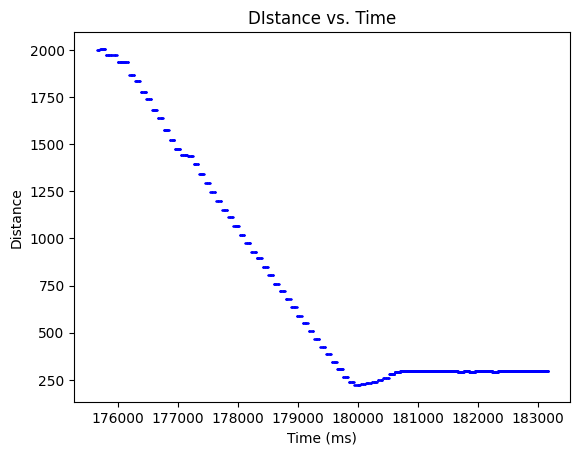

In [399]:
import matplotlib.pyplot as plt

plt.xlabel('Time (ms)')
plt.ylabel('Distance')
plt.plot(times[2:],tof[2:])
plt.title('DIstance vs. Time')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

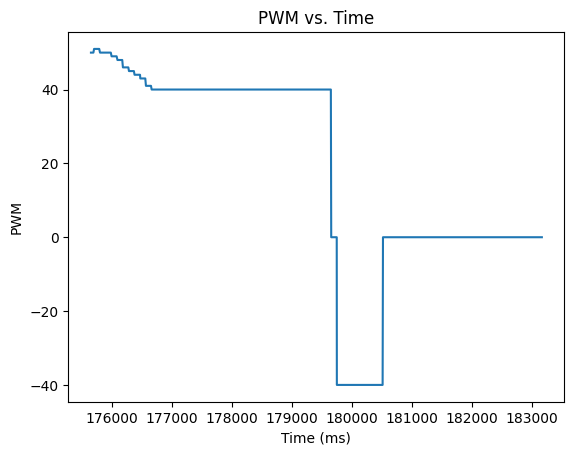

2023-05-03 17:02:55,115 | INFO     |: Disconnected from c0:07:1d:96:09:44


In [402]:
plt.xlabel('Time (ms)')
plt.ylabel('PWM')
plt.plot(times[2:],mot[2:])
plt.title('PWM vs. Time')
plt.show

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.yticks([min(d1),max(d1),min(d2),max(d2),min(pitch),max(pitch),min(roll),max(roll)])
plt.plot(TOFtimes,d1,label="TOF1")
plt.plot(TOFtimes,d2,label="TOF2")
plt.plot(IMUtimes,pitch,label="Pitch")
plt.plot(IMUtimes,roll,label="Roll")
plt.legend()
plt.title('TOF aand IMU Data')
plt.show


In [ ]:
plt.xlabel('Time (ms)')
plt.ylabel('Angle')
plt.yticks([min(pitch),max(pitch),min(roll),max(roll)])
plt.plot(IMUtimes,pitch,label="Pitch")
plt.plot(IMUtimes,roll,label="Roll")
plt.legend()
plt.title('IMU Data')
plt.show

In [ ]:
ble.stop_notify(ble.uuid['RX_STRING'])
ble.stop_notify(ble.uuid['RX_STRING2'])

## Disconnect

In [ ]:
# Disconnect
ble.disconnect()

In [ ]:
times= [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
trial1 = [0.4,10.6,19.9,29.7,39.8,50.1,60.2,69.9,80,89.9,96,109,115,127,80]
trial2 = [0.6,10.4,20.2,29.9,40.4,50.2,60.3,69.8,79.9,90.2,96.1,105,113,125,87]
trial3 = [0.5,10.7,20.1,30.1,40.1,49.9,60.1,70,79.8,89.8,96.5,106,118,124,72]

plt.plot(times[10:],trial1[10:],label = "Trial 1")
plt.plot(times,trial2,label = "Trial 2")
plt.plot(times,trial3,label = "Trial 3")
plt.xlabel('Actual (mm)')
plt.ylabel('Measured (mm)')
plt.show

In [ ]:
from uuid import uuid4
uuid4()